<a href="https://colab.research.google.com/github/AnjiLakshmi12/6thSem-ML-Lab/blob/main/1BM24CS401_Lab3_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/HR_comma_sep.csv")
print(df.head())
print(df.info())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [5]:
print(df.groupby('left').mean(numeric_only=True))

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


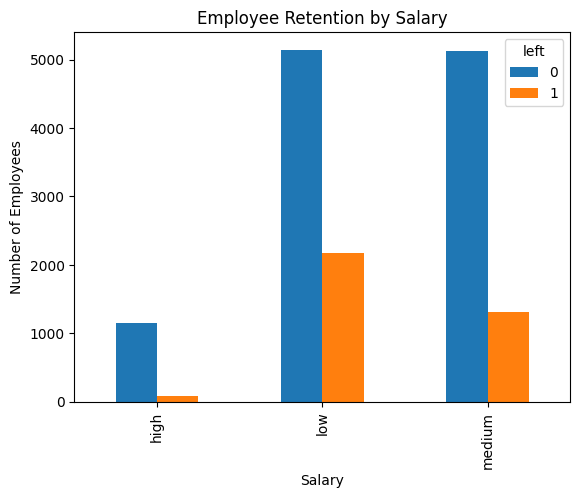

In [6]:
salary_retention = pd.crosstab(df.salary, df.left)

salary_retention.plot(kind='bar')
plt.title("Employee Retention by Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()

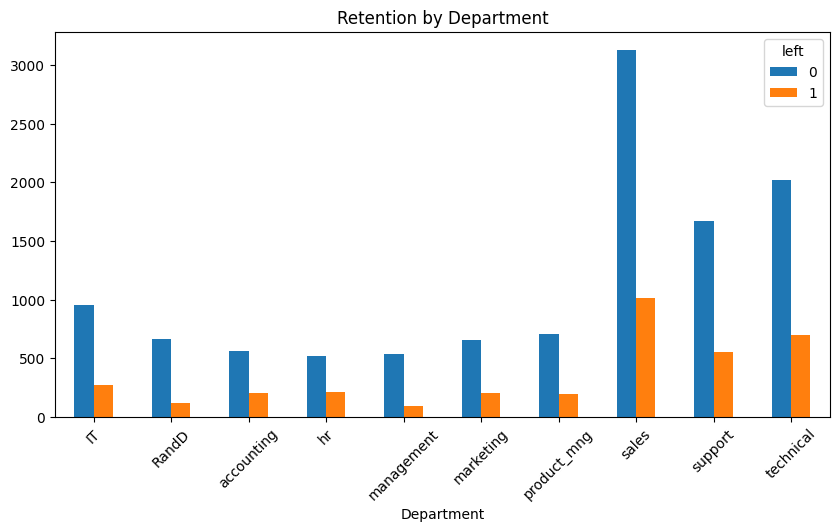

In [7]:
dept_retention = pd.crosstab(df.Department, df.left)

dept_retention.plot(kind='bar', figsize=(10,5))
plt.xticks(rotation=45)
plt.title("Retention by Department")
plt.show()

In [8]:
data = df[['satisfaction_level',
           'average_montly_hours',
           'promotion_last_5years',
           'salary']]

In [9]:
data = pd.get_dummies(data, columns=['salary'], drop_first=True)

In [10]:
X = data.values.astype(float)
y = df['left'].values

In [11]:
# Shuffle data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# 80% train, 20% test
split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [12]:
# Add column of 1s for bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
epochs = 1000

In [15]:
for i in range(epochs):

    z = np.dot(X_train, weights)
    predictions = sigmoid(z)

    # Gradient calculation
    gradient = np.dot(X_train.T, (predictions - y_train)) / len(y_train)

    # Update weights
    weights -= learning_rate * gradient

In [16]:
X = data.values.astype(float)
y = df['left'].values

In [17]:
z_test = np.dot(X_test, weights)
predictions_test = sigmoid(z_test)

# Convert probabilities to 0 or 1
y_pred = [1 if p >= 0.5 else 0 for p in predictions_test]

In [19]:
correct = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        correct += 1

accuracy = correct / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7553333333333333


In [20]:
df = pd.read_csv('/content/zoo-data.csv')

In [22]:
df = df.drop('animal_name', axis=1)

# Features and target
X = df.drop('class_type', axis=1).values
y = df['class_type'].values

# Standardization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term
m, n = X.shape
X = np.hstack((np.ones((m,1)), X))

# Train-Test Split (80-20)
split = int(0.8 * m)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]






KeyError: "['animal_name'] not found in axis"

In [23]:
# =========================
# 2. Build Logistic Regression (One-vs-Rest)
# =========================

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

classes = np.unique(y)
num_classes = len(classes)
weights = np.zeros((num_classes, n+1))

learning_rate = 0.01
iterations = 2000

for idx, cls in enumerate(classes):
    w = np.zeros(n+1)
    y_binary = np.where(y_train == cls, 1, 0)

    for _ in range(iterations):
        z = np.dot(X_train, w)
        pred = sigmoid(z)
        gradient = np.dot(X_train.T, (pred - y_binary)) / len(y_binary)
        w -= learning_rate * gradient

    weights[idx] = w


In [24]:
# =========================
# 3. Prediction & Accuracy
# =========================

def predict(X):
    scores = []
    for w in weights:
        scores.append(sigmoid(np.dot(X, w)))
    scores = np.array(scores)
    return classes[np.argmax(scores, axis=0)]

y_pred = predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7619047619047619


Confusion Matrix:
 [[5. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2. 1.]]


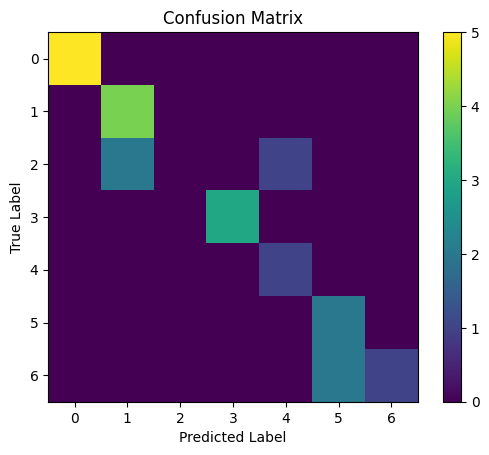

In [25]:
# =========================
# 4. Confusion Matrix
# =========================

conf_matrix = np.zeros((num_classes, num_classes))

for i in range(len(y_test)):
    true_label = int(y_test[i]) - 1
    pred_label = int(y_pred[i]) - 1
    conf_matrix[true_label][pred_label] += 1

print("Confusion Matrix:\n", conf_matrix)

plt.figure()
plt.imshow(conf_matrix)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()